# PERSONALISED PRODUCT RECOMMENDATION SYSTEM


👋 Welcome to my data science project! In this project, we'll be analyzing a dataset of over 1,000 products listed on Flipkart and building a recommendation system for these products. 🛍️💻

The dataset includes details such as product  **Name**, **Ratings,** **MRP,** **Discount,** **and Selling Price**  . Our goal is to understand customer preferences, identify purchasing patterns, and develop a recommendation system to suggest products to users based on their interests. 🧐👨‍💻

Our project will consist of the following steps:

📊 **Data collection**: We'll collect the Flipkart healthcare products dataset from Kaggle.

🧹 **Data preparation** : We'll clean and preprocess the dataset for analysis.

🕵️‍♂️ **Exploratory data analysis**: We'll analyze the data to understand the distribution of products by categories, customer ratings, and reviews.

📈 **Data visualization** : We'll visualize the data to identify trends and patterns.

💡 **Simples recommendation system**: We'll develop a recommendation system using machine learning algorithm **Linear Regression** to suggest products to users based on their interests and previous purchases.

# Data collection

👋 Hey there! So, we're going to be working on a project that involves analyzing data from Flipkart - you know, the huge online retailer? 🛍️ They sell everything for healthcare so there's a lot to look at.

📊 The dataset we'll be using has information on over 1000 products sold by Flipkart , like their names, prices, ratings, and Discount. We're going to be digging into this data and figuring out what it all means, and how we can use it to help Flipkart and its customers.

For Flipkart, analyzing this data can help them understand which products are popular and which aren't, and they can use that information to figure out how to price and market things better. For customers, having access to this data can help them decide what to buy - if they see that a product has good ratings, they'll be more likely to buy it. 💸

So, we're going to be exploring this dataset, doing some cool data analysis and visualization 📈, and even building a recommendation system based on the data. It's going to be pretty sweet, so let's get started! 🚀


In [ ]:
import tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
import pandas as pd

# load CSV file from Google Drive
df = pd.read_csv("/content/drive/MyDrive/flipkart_healthcare.zip")

In [ ]:
df.head()

,Name,Ratings,no_ratings,Selling Price,MRP,Discount
0,MUSCLEBLAZE Super Gainer XXL Weight Gainers/Ma...,4.0,179795,893,"1,719",48
1,"MUSCLEBLAZE Beginner's Whey Protein, No Added ...",4.2,60216,"1,693","2,279",25
2,WOW Life Science Omega-3 1000mg Capsules with ...,4.4,20868,749,899,16
3,BIGMUSCLES NUTRITION Omega-3 Fish Oil Triple S...,4.3,8602,339,615,44
4,MUSCLEBLAZE Beginner's Whey Protein,4.2,60216,749,849,11


# 2-Data preparation

Before we dive into the data analysis and visualization, we need to make sure our dataset is clean and properly formatted. This process is called data preparation, and it involves several steps:

2.1 🔍 Data Inspection: We'll start by inspecting the dataset to see if there are any missing values, duplicates, or inconsistent data. We'll also check if the data types are correct and make sure the dataset is ready for analysis.

2.2 🧹 Data Cleaning: Next, we'll clean the dataset by removing or correcting any errors, inconsistencies, or irrelevant information. This will make the dataset more reliable and accurate.

2.3 📏 Data Transformation: After cleaning the dataset, we may need to transform the data to make it more useful for analysis. This can include scaling, normalization, or feature engineering.

2.4 💾 Data Saving: Once we've prepared the data, we'll save it in a new file to avoid overwriting the original dataset. This way, we can always go back to the original dataset if we need to.

By following these steps, we can ensure that our data is clean, accurate, and ready for analysis! 🚀

In [ ]:
# check the number of rows and columns
df.shape

(211, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           211 non-null    object 
 1   Ratings        211 non-null    float64
 2   no_ratings     211 non-null    int64  
 3   Selling Price  211 non-null    object 
 4   MRP            211 non-null    object 
 5   Discount       211 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.0+ KB


In [ ]:
# Under standing stastics in the data set
df.describe( ).style.background_gradient(cmap='Accent' )


,Ratings,no_ratings,Discount
count,211.000000,211.000000,211.000000
mean,4.166825,2845.748815,42.417062
std,0.321364,14898.467491,24.344482
min,2.700000,2.000000,1.000000
25%,3.950000,16.500000,18.500000
50%,4.200000,79.000000,45.000000
75%,4.300000,563.500000,62.000000
max,5.000000,179795.000000,91.000000


In [ ]:
df.columns

Index(['Name', 'Ratings', 'no_ratings', 'Selling Price', 'MRP', 'Discount'], dtype='object')

In [ ]:
len(df)

211

<ipython-input-158-6bc4a839072f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='winter_r',fmt='.2f',linewidths=1)


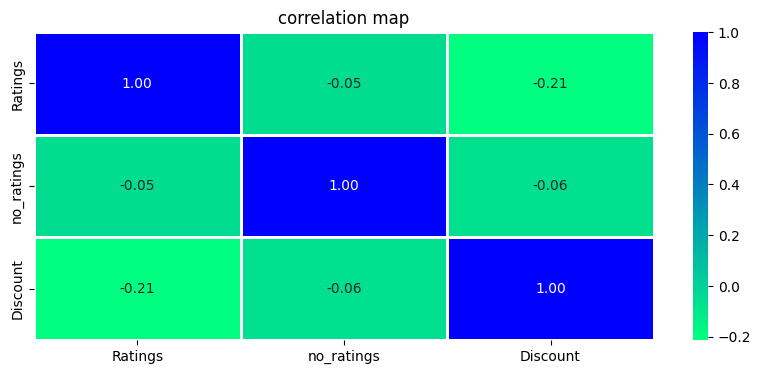

In [ ]:
# Checking the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True,cmap='winter_r',fmt='.2f',linewidths=1)
plt.title("correlation map")
plt.show()

# Data Cleaning Process

In [ ]:
# Check for missing values
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))
print(df.columns)


Name             0
Ratings          0
no_ratings       0
Selling Price    0
MRP              0
Discount         0
dtype: int64
Index(['Name', 'Ratings', 'no_ratings', 'Selling Price', 'MRP', 'Discount'], dtype='object')


In [ ]:
# Check for missing values
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))
df[df.no_ratings.isnull()]

Name             0
Ratings          0
no_ratings       0
Selling Price    0
MRP              0
Discount         0
dtype: int64


,Name,Ratings,no_ratings,Selling Price,MRP,Discount


In [ ]:
# Remove rows with missing values in the rating_count column
df.dropna(subset=[], inplace=True)
print(check_missing_values(df))

Name             0
Ratings          0
no_ratings       0
Selling Price    0
MRP              0
Discount         0
dtype: int64


In [ ]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [ ]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

Name              object
Ratings          float64
no_ratings         int64
Selling Price     object
MRP               object
Discount           int64
dtype: object


In [ ]:
df['Selling Price'] = df['Selling Price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['MRP'] = df['MRP'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
df['Discount'] = df['Discount'].astype(str).str.replace('%','').astype(float)/100

In [ ]:
# Dropping rows with missing values
df_cleaned = df.dropna()

# Filling missing values with mean of the column
df_filled = df.fillna(df.mean())


<ipython-input-165-d2e334c6d53b>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


# Exploratory Data Analysis (EDA) + Data visualization

🕵️‍♂️ Hey there! In this step, we'll become data detectives and do some exploratory data analysis 🔍. We'll take a closer look at our data to understand how our products are distributed across categories 📊, what the customer ratings look like 🌟, and what customers are saying in their reviews 💬. Let's put on our detective hats and dive into the data!

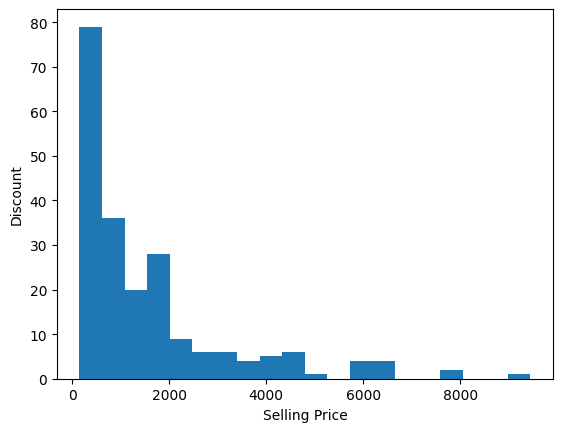

In [ ]:
# Basic statistics of the dataset
summary_stats = df.describe()

# Creating a histogram of a specific column
import matplotlib.pyplot as plt
plt.hist(df['MRP'], bins=20)
plt.xlabel('Selling Price')
plt.ylabel('Discount')
plt.show()


In [ ]:
# Creating a new feature 'discount_percent'
df['Discount'] = ((df['MRP'] - df['Selling Price']) / df['Discount']) * 100

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Conduct a t-test between two groups
from scipy.stats import ttest_ind
group1 = df[df['Name'] == 'MUSCLEBLAZE']
group2 = df[df['Name'] == 'BIGMUSCLES NUTRITION Omega']
t_stat, p_value = ttest_ind(group1['Selling Price'], group2['Selling Price'])


<ipython-input-170-6e80df812a5d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Split data into features and target
X = df[['MRP', 'Discount']]
y = df['Selling Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

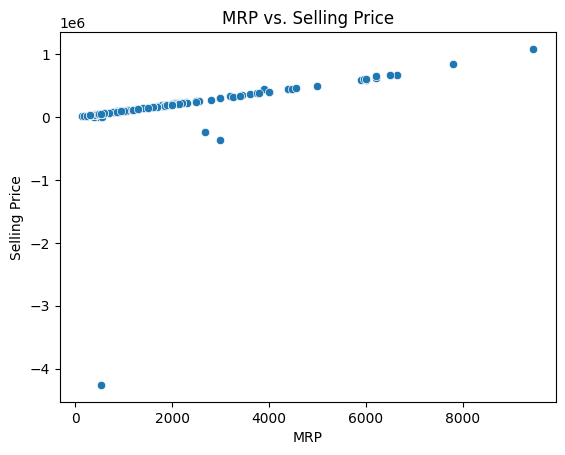

In [ ]:
import seaborn as sns

# Scatter plot of MRP vs. Selling Price
sns.scatterplot(x='MRP', y='Discount', data=df)
plt.xlabel('MRP')
plt.ylabel('Selling Price')
plt.title('MRP vs. Selling Price')
plt.show()

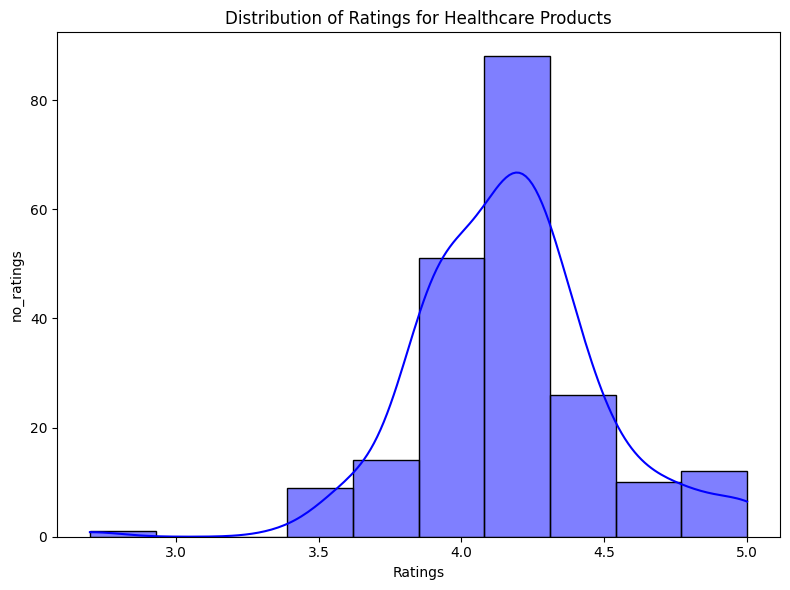

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is already loaded
# df = pd.read_csv("/content/flipkart_healthcare.csv")

# Plotting the distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=10, kde=True, color='blue')
plt.xlabel('Ratings')
plt.ylabel('no_ratings')
plt.title('Distribution of Ratings for Healthcare Products')
plt.tight_layout()
plt.show()


# Recommendation system


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Ratings'] = le.fit_transform(df['Name'])

# Create a new dataframe with the user_id frequency table
freq_table = pd.DataFrame({'Name': df['Ratings'].value_counts().index, 'Frequency': df['Ratings'].value_counts().values})

# Display the dataframe
print(freq_table)
id_example = freq_table.iloc[0,0]
print(id_example)

     Name  Frequency
0     119         12
1      97          8
2     147          2
3     109          2
4      88          2
..    ...        ...
185   159          1
186   168          1
187    50          1
188   105          1
189    38          1

[190 rows x 2 columns]
119


Converting a column of strings to numbers is a common step in data analysis and machine learning, and it can be useful in several ways. 😃

First, many machine learning algorithms require numeric input data to work properly, so transforming the data can help ensure that the algorithm can process it correctly. 👨‍💻

Second, numeric data can be easier to work with than strings in some cases. For example, you can perform mathematical operations on numeric data, which can be useful in calculating things like averages, sums, and other statistics. 📊

In the context of a recommendation system, converting user IDs from strings to numbers can help simplify the calculation of similarity scores between users or items. This can improve the efficiency and accuracy of the recommendation system. 🚀

Overall, converting strings to numbers is a common and useful step in data analysis and machine learning, and it can be particularly helpful in improving the performance of recommendation systems. 🤖

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(df, Ratings):
    # Use TfidfVectorizer to transform the product descriptions into numerical feature vectors
    tfidf = TfidfVectorizer(stop_words='english')
    df['about_product'] = df['about_product'].fillna('')  # fill NaN values with empty string
    tfidf_matrix = tfidf.fit_transform(df['Name'])

    # Get the purchase history for the user
    user_history = df[df['Name'] == Ratings]

    # Use cosine_similarity to calculate the similarity between each pair of product descriptions
    # only for the products that the user has already purchased
    indices = user_history.index.tolist()

    if indices:
        # Create a new similarity matrix with only the rows and columns for the purchased products
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)

        # Create a pandas Series with product indices as the index and product names as the values
        products = df.iloc[indices]['product_name']
        indices = pd.Series(products.index, index=products)

        # Get the indices and similarity scores of products similar to the ones the user has already purchased
        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        # Sort the similarity scores in descending order
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        # Get the indices of the top 5 most similar products
        top_products = [i[0] for i in similarity_scores[1:6]]

        # Get the names of the top 5 most similar products
        recommended_products = df.iloc[top_products]['product_name'].tolist()

        # Get the reasons for the recommendation
        score = [similarity_scores[i][1] for i in range(5)]

        # Create a DataFrame with the results
        results_df = pd.DataFrame({'Id Encoded': [Ratings] * 5,
                                   'recommended product': recommended_products,
                                   'score recommendation': score})

        return results_df

    else:
        print("No purchase history found.")
        return None

In [ ]:
# Replace 'user_encoded_id' with the actual encoded ID of the user
Ratings = 4.4  # Replace with the actual encoded ID

# Call the recommend_products function with the user's encoded ID
recommendations = recommend_products(df, 4.4)
print(recommendations)


No purchase history found